In [32]:
import cv2
import os

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

#TensorFlow version
print(tf.__version__)


2.16.1


In [11]:
def process_and_save_images(input_folder, output_folder, size=(224, 224)):
    """
    Process images by resizing and saving them to the output folder.

    Args:
    - input_folder (str): Path to the folder containing images.
    - output_folder (str): Path to save processed images.
    - size (tuple): Desired dimensions for the output images.
    
    Returns:
    - total_images (int): Number of images processed.
    """
    total_images = 0

    for person_name in os.listdir(input_folder):
        person_folder = os.path.join(input_folder, person_name, 'images')
        if os.path.isdir(person_folder):
            output_person_folder = os.path.join(output_folder, person_name)
            os.makedirs(output_person_folder, exist_ok=True)
            
            for filename in os.listdir(person_folder):
                img_path = os.path.join(person_folder, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, size)
                    processed_image_path = os.path.join(output_person_folder, filename)
                    cv2.imwrite(processed_image_path, img)
                    total_images += 1
                else:
                    print(f"Failed to load image: {img_path}")
    
    print(f"Total images processed from 'images' folder: {total_images}")
    return total_images


In [12]:
def extract_frames_from_videos(input_folder, output_folder, frame_rate=5, size=(224, 224)):
    """
    Extract frames from videos and save them to the output folder.

    Args:
    - input_folder (str): Path to the folder containing videos.
    - output_folder (str): Path to save extracted frames.
    - frame_rate (int): Number of frames to extract per second.
    - size (tuple): Desired dimensions for the output frames.
    
    Returns:
    - total_frames (int): Number of frames extracted from videos.
    """
    total_frames = 0

    for person_name in os.listdir(input_folder):
        person_folder = os.path.join(input_folder, person_name, 'video_frames')
        if os.path.isdir(person_folder):
            output_person_folder = os.path.join(output_folder, person_name)
            os.makedirs(output_person_folder, exist_ok=True)

            for video_file in os.listdir(person_folder):
                video_path = os.path.join(person_folder, video_file)
                cap = cv2.VideoCapture(video_path)

                count = 0
                success, image = cap.read()
                fps = cap.get(cv2.CAP_PROP_FPS)
                interval = int(fps // frame_rate)

                while success:
                    if count % interval == 0:
                        resized_image = cv2.resize(image, size)
                        frame_name = f"{os.path.splitext(video_file)[0]}_frame{count}.jpg"
                        frame_path = os.path.join(output_person_folder, frame_name)
                        cv2.imwrite(frame_path, resized_image)
                        total_frames += 1

                    success, image = cap.read()
                    count += 1

                cap.release()

    print(f"Total frames extracted from 'video_frames' folder: {total_frames}")
    return total_frames


In [13]:
# Define paths
input_folder = 'dataset'  # The main dataset directory
output_folder = 'dataset_frames'  # The directory where processed images and extracted frames will be stored

# Process images from the images folder
total_images = process_and_save_images(input_folder, output_folder)

# Extract frames from videos and save them in the same structure
total_frames = extract_frames_from_videos(input_folder, output_folder)


Failed to load image: dataset\bhavya\images\IMG_5272.HEIC
Failed to load image: dataset\bhavya\images\IMG_5273.HEIC
Total images processed from 'images' folder: 224
Total frames extracted from 'video_frames' folder: 745


In [14]:
import os

def rename_images_in_folder(folder):
    """
    Rename all images in each student's folder within the dataset_frames directory.

    Args:
    - folder (str): Path to the folder where images are stored.
    """
    for person_name in os.listdir(folder):
        person_folder = os.path.join(folder, person_name)
        if os.path.isdir(person_folder):
            for idx, filename in enumerate(os.listdir(person_folder)):
                file_path = os.path.join(person_folder, filename)
                if os.path.isfile(file_path):
                    new_filename = f"image{idx}.jpg"
                    new_file_path = os.path.join(person_folder, new_filename)
                    os.rename(file_path, new_file_path)
                    print(f"Renamed {file_path} to {new_file_path}")

# Define path to the dataset_frames directory
dataset_frames_folder = 'dataset_frames'

# Rename images
rename_images_in_folder(dataset_frames_folder)


Renamed dataset_frames\bhavya\IMG_5274.JPG to dataset_frames\bhavya\image0.jpg
Renamed dataset_frames\bhavya\IMG_5275.JPG to dataset_frames\bhavya\image1.jpg
Renamed dataset_frames\bhavya\IMG_5276.JPG to dataset_frames\bhavya\image2.jpg
Renamed dataset_frames\bhavya\IMG_5277.JPG to dataset_frames\bhavya\image3.jpg
Renamed dataset_frames\bhavya\IMG_5278.JPG to dataset_frames\bhavya\image4.jpg
Renamed dataset_frames\bhavya\IMG_5279.JPG to dataset_frames\bhavya\image5.jpg
Renamed dataset_frames\bhavya\IMG_5280.JPG to dataset_frames\bhavya\image6.jpg
Renamed dataset_frames\bhavya\IMG_5281.JPG to dataset_frames\bhavya\image7.jpg
Renamed dataset_frames\bhavya\IMG_5282.JPG to dataset_frames\bhavya\image8.jpg
Renamed dataset_frames\bhavya\IMG_5283.JPG to dataset_frames\bhavya\image9.jpg
Renamed dataset_frames\bhavya\IMG_5284.JPG to dataset_frames\bhavya\image10.jpg
Renamed dataset_frames\bhavya\IMG_5285.JPG to dataset_frames\bhavya\image11.jpg
Renamed dataset_frames\bhavya\IMG_5286.JPG to data

In [7]:
# Create an instance of ImageDataGenerator with augmentation options
datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Normalize pixel values
    rotation_range=20,  # Randomly rotate images
    width_shift_range=0.2,  # Randomly shift images horizontally
    height_shift_range=0.2,  # Randomly shift images vertically
    shear_range=0.15,  # Randomly apply shearing
    zoom_range=0.15,  # Randomly zoom in
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'  # Fill pixels for rotations and shifts
)

# Load and augment data directly from the directory
train_generator = datagen.flow_from_directory(
    'dataset_frames',  # Path to dataset directory
    target_size=(224, 224),  # Use 224x224 to match the model input
    batch_size=32,  # Batch size for training
    class_mode='categorical'  # Use categorical labels
)


Found 969 images belonging to 8 classes.


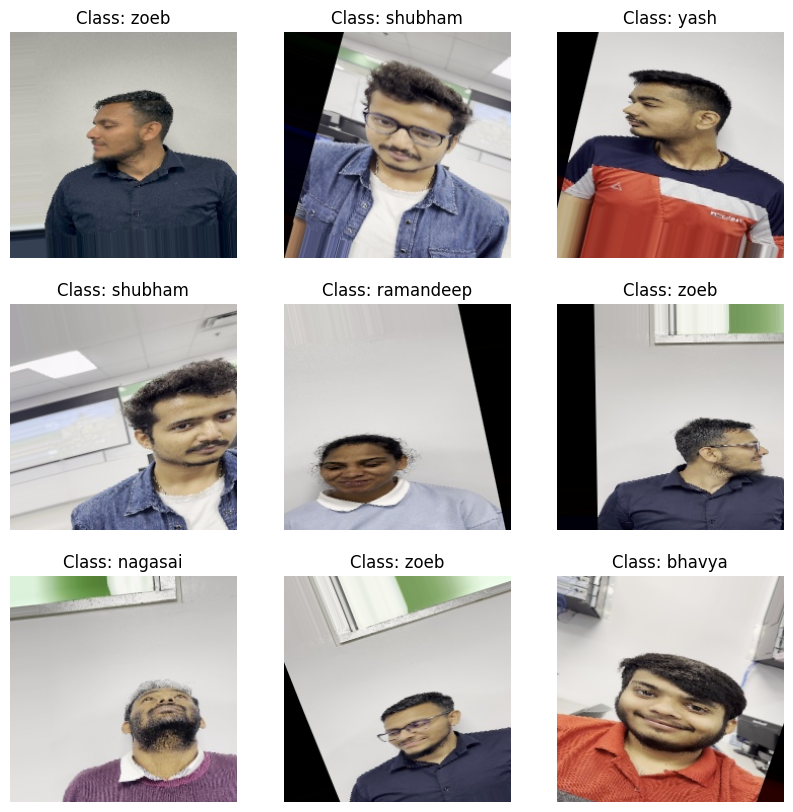

In [8]:
import matplotlib.pyplot as plt

# Generate a batch of augmented images and labels
x_batch, y_batch = next(train_generator)

# Plot the first 9 images in the batch
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_batch[i])
    plt.title(f"Class: {list(train_generator.class_indices.keys())[y_batch[i].argmax()]}")
    plt.axis('off')
plt.show()


In [9]:
# Define a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),  # Match this with target_size
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),  # Dropout to prevent overfitting
    Dense(train_generator.num_classes, activation='softmax')  # Output layer for classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model architecture
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │         2,056 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,246,728 (84.86 MB)

 Trainable params: 22,246,728 (84.86 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model with early stopping
history = model.fit(
    train_generator,
    epochs=50,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=train_generator,  # Add validation data if available
    validation_steps=train_generator.samples // train_generator.batch_size,
    callbacks=[early_stopping]
)


Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.9584 - loss: 0.1257 - val_accuracy: 0.9792 - val_loss: 0.0794
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9688 - loss: 0.2271 - val_accuracy: 1.0000 - val_loss: 0.0543
Epoch 3/50


c:\Users\vicky\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


30/30 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.9575 - loss: 0.1378 - val_accuracy: 0.9802 - val_loss: 0.0667
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9688 - loss: 0.0806 - val_accuracy: 1.0000 - val_loss: 0.0122
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.9508 - loss: 0.1509 - val_accuracy: 0.9729 - val_loss: 0.0941
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9062 - loss: 0.1940 - val_accuracy: 1.0000 - val_loss: 0.0088
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.9574 - loss: 0.1293 - val_accuracy: 0.9927 - val_loss: 0.0390
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.0496 - val_accuracy: 1.0000 - val_loss: 0.0281
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.9732 - loss: 0.0812 - val_accuracy: 0.9896 - val_loss: 0.0380


In [22]:
# Save the entire model as a HDF5 file
model.save('student_recognition_model_2.h5')


In [34]:
# Set a confidence threshold
confidence_threshold = 0.7  # You can adjust this value based on validation results


In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create a test data generator with rescaling
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Load the test data using the generator
test_generator = test_datagen.flow_from_directory(
    'dataset_frames',  # Path to test dataset directory
    target_size=(224, 224),  # Same size as training images
    batch_size=32,  # Batch size for evaluation
    class_mode='categorical',  # Ensure labels are generated correctly
    shuffle=False  # No need to shuffle for evaluation
)


Found 969 images belonging to 8 classes.


In [25]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


c:\Users\vicky\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 259ms/step - accuracy: 0.9992 - loss: 0.0033
Test Loss: 0.0280, Test Accuracy: 0.9885


In [38]:
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_image_class(model, img_path, class_labels, confidence_threshold=0.6):
    # Load the image
    img = image.load_img(img_path, target_size=(224, 224))

    # Convert the image to a numpy array
    img_array = image.img_to_array(img)

    # Expand dimensions to match the input shape of the model
    img_array = np.expand_dims(img_array, axis=0)

    # Rescale pixel values
    img_array /= 255.0

    # Make a prediction
    predictions = model.predict(img_array)

    # Get the maximum predicted probability
    max_probability = np.max(predictions)

    # Get the index of the highest probability class
    predicted_class_index = np.argmax(predictions, axis=1)[0]

    # Get the class label
    predicted_class_label = class_labels[predicted_class_index]

    # Check if the prediction confidence is above the threshold
    if max_probability < confidence_threshold:
        predicted_class_label = "unknown"

    print(f"Predicted class: {predicted_class_label}, Confidence: {max_probability:.2f}")

# Define class labels from the training data
class_labels = list(train_generator.class_indices.keys())

# Test with a new image
img_path = 'testdata\Screenshot 2024-08-05 191332.png'  # Replace with the path to your image
predict_image_class(model, img_path, class_labels, confidence_threshold=0.6)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted class: shubham, Confidence: 1.00


In [36]:
import numpy as np
from tensorflow.keras.preprocessing import image

def temperature_scaled_softmax(logits, temperature=1.0):
    # Apply temperature scaling to logits before softmax
    exp_logits = np.exp(logits / temperature)
    return exp_logits / np.sum(exp_logits, axis=1, keepdims=True)

def predict_with_temperature_scaling(model, img_path, class_labels, confidence_threshold=0.6, temperature=2.0):
    # Load the image
    img = image.load_img(img_path, target_size=(224, 224))

    # Convert the image to a numpy array
    img_array = image.img_to_array(img)

    # Expand dimensions to match the input shape of the model
    img_array = np.expand_dims(img_array, axis=0)

    # Rescale pixel values
    img_array /= 255.0

    # Get logits from the model (if model is modified to output logits)
    predictions = model.predict(img_array)

    # Apply temperature scaling to the predictions
    scaled_predictions = temperature_scaled_softmax(predictions, temperature=temperature)

    # Get the maximum predicted probability
    max_probability = np.max(scaled_predictions)

    # Get the index of the highest probability class
    predicted_class_index = np.argmax(scaled_predictions, axis=1)[0]

    # Get the class label
    predicted_class_label = class_labels[predicted_class_index]

    # Check if the prediction confidence is above the threshold
    if max_probability < confidence_threshold:
        predicted_class_label = "unknown"

    print(f"Predicted class: {predicted_class_label}, Confidence: {max_probability:.2f}")

# Define class labels from the training data
class_labels = list(train_generator.class_indices.keys())

# Test with a new image
img_path = 'testdata\Screenshot 2024-08-05 191332.png'  # Replace with the path to your image
predict_with_temperature_scaling(model, img_path, class_labels, confidence_threshold=0.6, temperature=2.0)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted class: unknown, Confidence: 0.19


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


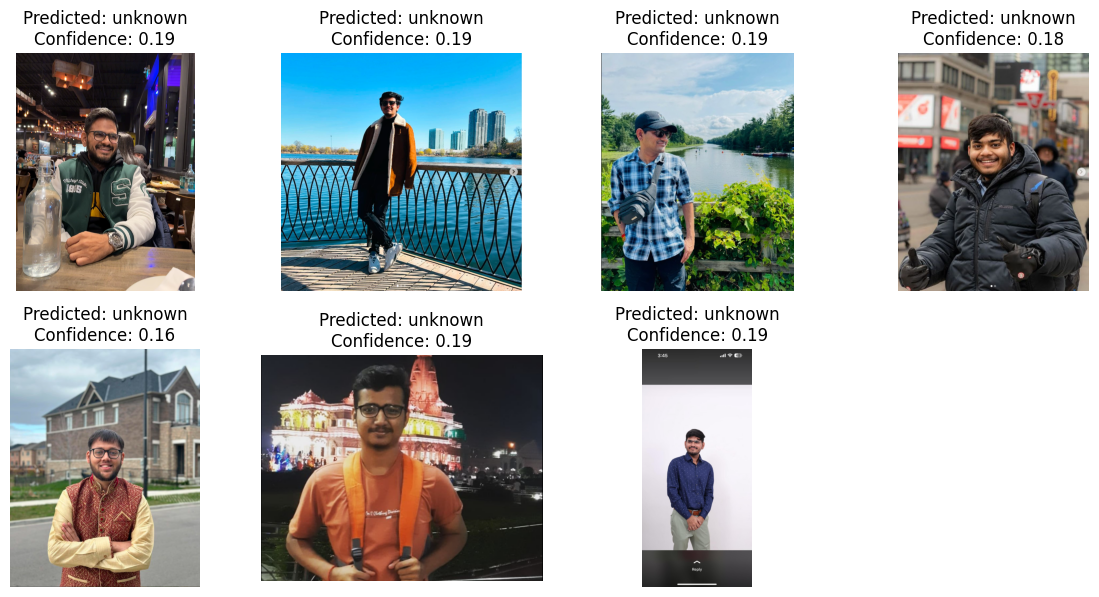

In [35]:
def temperature_scaled_softmax(logits, temperature=1.0):
    exp_logits = np.exp(logits / temperature)
    return exp_logits / np.sum(exp_logits, axis=1, keepdims=True)

def predict_and_display_images(model, image_folder, class_labels, confidence_threshold=0.6, temperature=2.0):
    # List all image files in the directory
    image_files = [f for f in os.listdir(image_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]

    plt.figure(figsize=(12, 12))
    
    for i, img_file in enumerate(image_files):
        # Load the image
        img_path = os.path.join(image_folder, img_file)
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.0

        # Get logits from the model
        predictions = model.predict(img_array)
        scaled_predictions = temperature_scaled_softmax(predictions, temperature=temperature)

        # Get the maximum predicted probability
        max_probability = np.max(scaled_predictions)
        predicted_class_index = np.argmax(scaled_predictions, axis=1)[0]
        predicted_class_label = class_labels[predicted_class_index]

        # Check if the prediction confidence is above the threshold
        if max_probability < confidence_threshold:
            predicted_class_label = "unknown"

        # Display the image with the predicted label
        plt.subplot(4, 4, i + 1)
        plt.imshow(image.load_img(img_path))
        plt.title(f"Predicted: {predicted_class_label}\nConfidence: {max_probability:.2f}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Define class labels from the training data
class_labels = list(train_generator.class_indices.keys())

# Path to the folder containing images to predict
image_folder = 'testdata'  # Replace with the path to your image folder

# Call the function to predict and display images
predict_and_display_images(model, image_folder, class_labels, confidence_threshold=0.6, temperature=2.0)
